#Alzeimer Project
from Ricardo


In [1]:
import pandas as pd
from pathlib import Path
import numpy as np
import nibabel as nib
from skimage import io
from google.colab import drive
import matplotlib.pyplot as plt

##Import Data
###Target variable
* hCon - hospital consultation
* ADHD - Attention deficit hyperactivity disorder

In [2]:
urlTrain_sexAge = "https://github.com/jricardoct15/sep23_cds_int_alzheimer/raw/main/Train_sexAge.csv"
dfTrain_sexAge = pd.read_csv(urlTrain_sexAge)

In [3]:
dfTrain_sexAge.info()
dfTrain_sexAge['Age'].min()
dfTrain_sexAge['Age'].max()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      147 non-null    object 
 1   target  147 non-null    object 
 2   Sex     147 non-null    int64  
 3   Age     147 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.7+ KB


17.6

### Import the nii.gz files
nifti images

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
def OpenNiftiGitHubFile (PathAndFileName,UserName= "jricardoct15",GithubRepo="sep23_cds_int_alzheimer"):
  ''' Open nifti files from git hub
  User - github user name
  PathAndFileName - includs path/filename.nii.gz
  GithubRepo - Github Repository
  '''
  url = f"https://github.com/{UserName}/{GithubRepo}/raw/main/{PathAndFileName}"
  !wget --no-cache --backups=1 {url}

  data = nib.load(PathAndFileName).get_fdata()

  !rm {PathAndFileName}
  return data

In [ ]:
fileName = "avg152T1_LR_nifti.nii.gz"

img1 = OpenNiftiGitHubFile (fileName)

In [7]:
# https://nipy.org/nibabel/gettingstarted.html
print("Image Shape: ",img1.shape)
print("Data type: ",type(img1))

Image Shape:  (91, 109, 91)
Data type:  <class 'numpy.ndarray'>


In [ ]:
dir(img1)

View Image

In [ ]:
test = img1[:,:,54]
plt.imshow(test)
plt.show()

In [15]:
def PlotNifti(X,Y,Z):
  plt.subplot(2,2,1)
  plt.imshow(img1[:,:,Z])
  plt.gcf().set_size_inches(10,10)

  plt.subplot(2,2,2)
  plt.imshow(img1[:,Y,:])
  plt.gcf().set_size_inches(10,10)

  plt.subplot(2,2,3)
  plt.imshow(img1[X,:,:])
  plt.gcf().set_size_inches(10,10)
  plt.show()

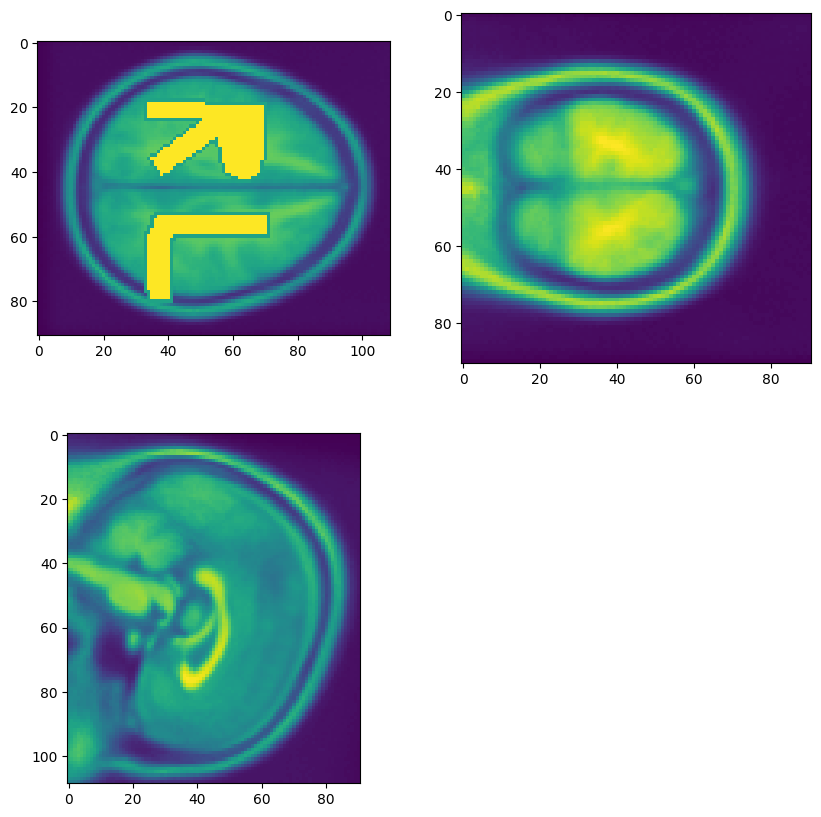

In [18]:
PlotNifti(45,20,54)

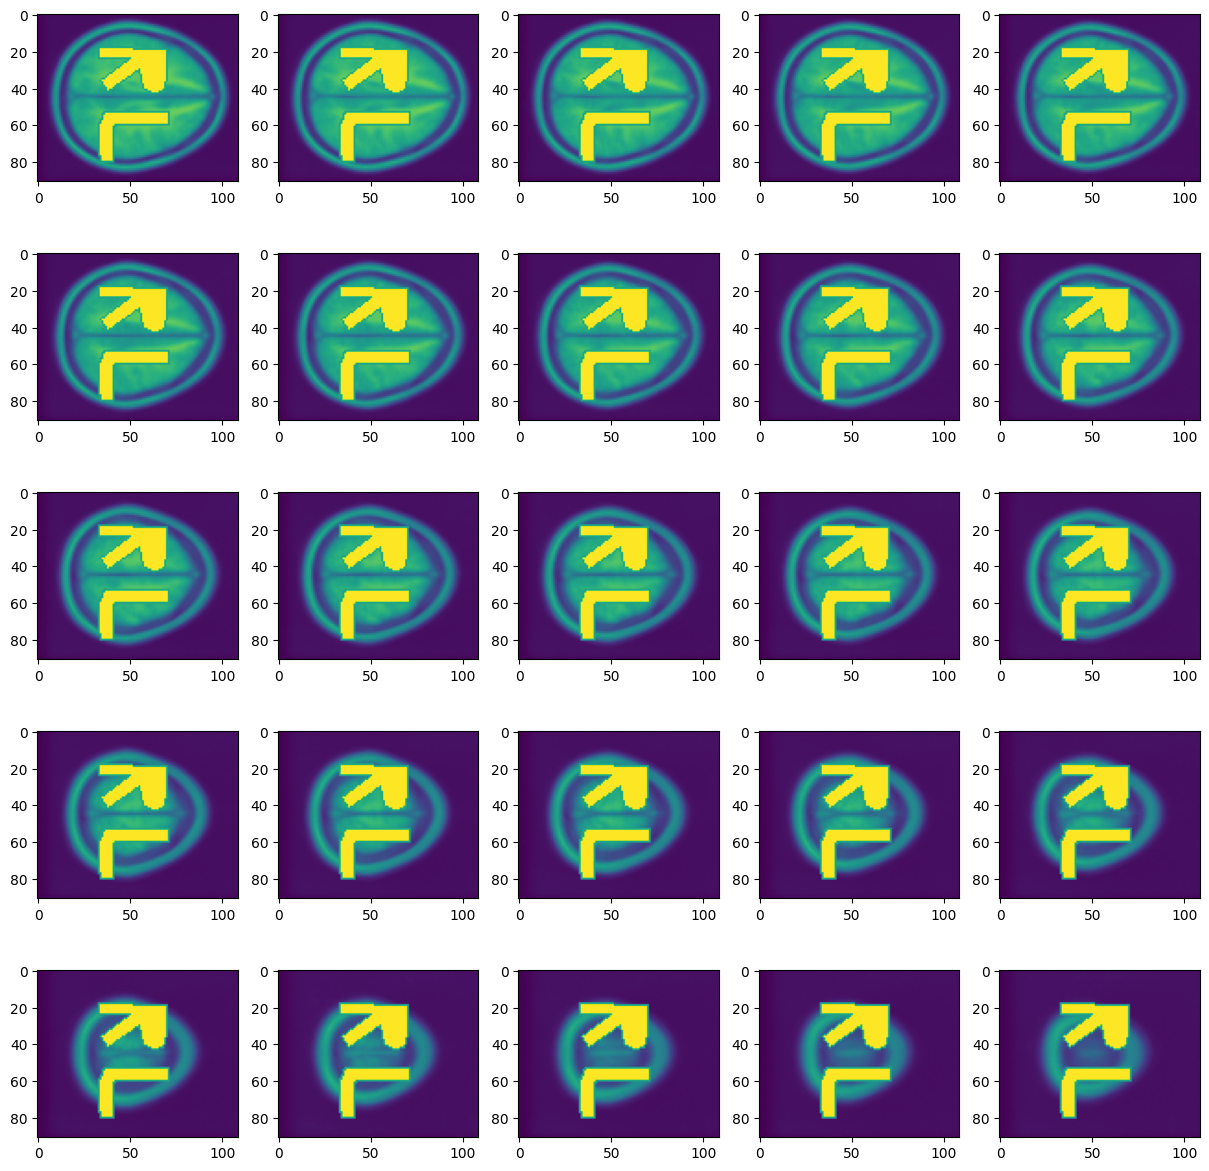

In [ ]:
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.imshow(img1[:,:,54+i])
  plt.gcf().set_size_inches(15,15)
plt.show()